In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn3_circles
from itertools import chain
pd.set_option('display.max_rows', 1000)

In [12]:
os.chdir('/mnt/bioadhoc-temp/Groups/vd-ay/jreyna-temp/projects/dchallenge/')

In [13]:
outdir = 'results/notebooks/gene_list_comparison.senate/'
os.makedirs(outdir, exist_ok=True)

## Load the gene data

In [14]:
gene_ref = 'results/refs/gencode/v30/gencode.v30.annotation.grch37.bed'
cols = ['chrom', 'start', 'end', 'strand', 'type', 'geneid', 'genename', 'detailed-type']
gencode = pd.read_table(gene_ref, header=None, names=cols)

# extract just the genes
genes_df = gencode.copy() #loc[gencode.type.isin(['gene'])]
genes_df = genes_df.loc[~genes_df.duplicated(subset='geneid'), :]
genes_df.loc[:, 'chrom'] = genes_df['chrom'].astype(str)
genes_df.set_index('geneid', inplace=True)

## First Analysis using PieQTLs WITHOUT SigGWAS Intersection

In [15]:
### Joining the Summary Tables

In [16]:
# join_fn = os.path.join(outdir, 'Unique_Genes_And_SNPs.xlsx')
# writer = pd.ExcelWriter(join_fn, engine='xlsxwriter')

In [17]:
# # finemapping
# finemap_summary = 'results/main/intersect_t1d_gwas_hichip/Unique_Counts_By_Cell_Line.xlsx'
# finemap_summary = pd.read_excel(finemap_summary)
# finemap_summary.columns = ['Cell Line', 'SNPs', 'Genes']

# # colocalization
# coloc_summary = 'results/notebooks/colocalization_with_eqtl_catalogue/Unique_Counts_By_Cell_Line.xlsx'
# coloc_summary = pd.read_excel(coloc_summary)
# coloc_summary.columns = ['Cell Line', 'SNPs', 'Genes']

# # pieqtls
# pieqtls_summary = 'results/main/gwas_pieqtls/2021_chiou_et_al/2021_chandra_et_al/Unique_Counts_By_Cell_Line.xlsx'
# pieqtls_summary = pd.read_excel(pieqtls_summary)
# pieqtls_summary.columns = ['Cell Line', 'SNPs', 'Genes']

In [18]:
# finemap_summary.to_excel(writer, index=False, sheet_name='finemapping')
# coloc_summary.to_excel(writer, index=False, sheet_name='colocalization')
# pieqtls_summary.to_excel(writer, index=False, sheet_name='pieqtls')

In [19]:
# writer.save()

### Making the venn diagram

In [71]:
finemap_genes = 'results/main/finemapping/sgl_intersect/gene_list.txt'
finemap_genes = pd.read_table(finemap_genes, header=None).squeeze('columns').tolist()

In [72]:
coloc_genes = 'results/main/coloc/summary/gene_list.txt'
coloc_genes = set(pd.read_table(coloc_genes, header=None).squeeze().tolist())

In [73]:
pieqtls_genes = 'results/main/pieqtls/sgl_intersect/gene_list.txt'
pieqtls_genes = pd.read_table(pieqtls_genes, header=None).squeeze('columns').tolist()

In [94]:
finemap_set = set(finemap_genes)
coloc_set = set(coloc_genes)
pieqtls_set = set(pieqtls_genes)

In [95]:
finemap_set.intersection(coloc_set, pieqtls_set)

{'ENSG00000089022'}

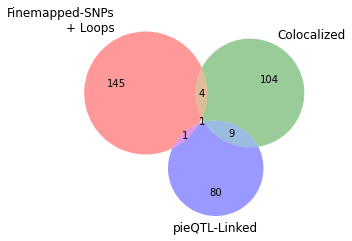

In [75]:
fig, ax = plt.subplots()
venn3([set(finemap_genes), set(coloc_genes), set(pieqtls_genes)], set_labels=['Finemapped-SNPs\n+ Loops',
                                                                             'Colocalized',
                                                                             'pieQTL-Linked'])
fn = os.path.join(outdir, 'threeway_comparison.svg')
fig.savefig(fn, dpi=600)

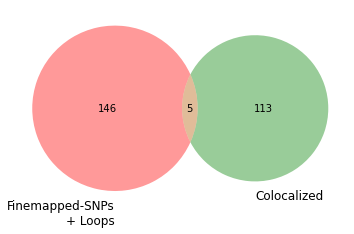

In [31]:
venn2([set(finemap_genes), set(coloc_genes)], set_labels=['Finemapped-SNPs\n+ Loops',
                                                          'Colocalized'])

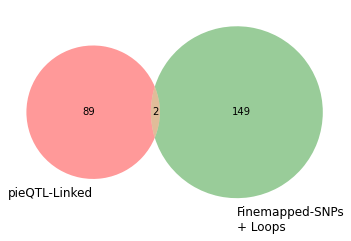

In [32]:
venn2([set(pieqtls_genes), set(finemap_genes)], set_labels=['pieQTL-Linked', 'Finemapped-SNPs\n+ Loops'])

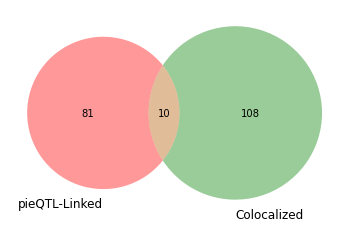

In [33]:
venn2([set(pieqtls_genes), set(coloc_genes)], set_labels=['pieQTL-Linked', 'Colocalized'])

## Evaluating Highly and Under Studied Genes

In [76]:
union_genelist = set(finemap_genes).union(coloc_genes).union(pieqtls_genes)
union_df = genes_df.iloc[genes_df.index.isin(union_genelist)]
print('Number of genes in the union: {}'.format(union_df.shape[0]))

# extracting all protein coding genes
union_prots = union_df.loc[union_df['detailed-type'] == 'protein_coding']

Number of genes in the union: 339


In [77]:
union_prots.head()

,chrom,start,end,strand,type,genename,detailed-type
geneid,,,,,,,
ENSG00000142686,chr1,36179478,36184495,-,gene,C1orf216,protein_coding
ENSG00000181817,chr1,36856839,36863509,-,gene,LSM10,protein_coding
ENSG00000183431,chr1,38422647,38455747,-,gene,SF3A3,protein_coding
ENSG00000183386,chr1,38462442,38471278,-,gene,FHL3,protein_coding
ENSG00000116641,chr1,62919969,63154039,-,gene,DOCK7,protein_coding


In [78]:
# genes from malacards
malacards = pd.read_table('results/refs/genecards/2022.MalaCards.T1D.tsv')

In [79]:
# # genes form an enrichr dataset
# import json
# def read_gene_data(json_fn):
#     with open(json_fn) as f:
#         j = json.load(f)
        
#     genelist = []
#     for item in j['associations']:
#         genelist.append(item['gene']['symbol'])
#     return(genelist)

# pancreas_fn = 'results/refs/enrichr/t1d.pancreas.GEO+Signatures+of+Differentially+Expressed+Genes+for+Diseases.json'
# pancreas_genelist = read_gene_data(pancreas_fn)
# tcell_fn = 'results/refs/enrichr/t1d.t_lymphocyte.GEO+Signatures+of+Differentially+Expressed+Genes+for+Diseases.json'
# tcell_genelist = read_gene_data(tcell_fn)
# enrichr_genelist = list(set(pancreas_genelist + tcell_genelist))
# print('Number of genes in enrichr: {}'.format(len(enrichr_genelist)))
# enrichr_genelist[0:10]

In [80]:
# genes from a Klak et al 2020
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7882399/
klak_genes = ['PTPN22', 'PHTF1', 'CAMSAP2', 'IL10', 'IFIH1', 'STAT4', 'CTLA4', 'ACOXL',
        'EFR3B', 'AFF3', 'CCR5', 'AC080079.1', 'NOL8P1', 'ADAD1', 'IL21', 'IL2',
        'LINC02357', 'IL7R', 'CENPW', 'BACH2', 'AL596442.1', 'AL049612.1', 'TNFAIP3', 'SKAP2',
        'COBL', 'IKZF1', 'GLIS3', 'NRP1', 'IL2RA', 'RNLS', 'INS', 'BAD',
        'ITGB7', 'ERBB3', 'DGKA', 'ZDHHC17', 'SH2B3', 'CD69', 'LMO7', 'GPR183', 'AL163932.1',
        'LINC01550', 'ZFP36L1', 'MAGOH3P', 'DLK1', 'CTSH', 'RASGPR1', 'IL27', 'CLEC16A',
        'DEXI', 'BCAR1', 'SMARCE1', 'ORMDL3', 'CD226', 'PTPN2', 'FUT2', 'PRKD2', 'TYK2',
        'CDC34', 'MADCAM1', 'SIRPG', 'UBASH3A', 'AC002378.1', 'C1QTNF6', 'RAC2', 'TLR7/8', 'GAB3']

In [81]:
# genes from the edGAR database 
# http://edgar.biocomp.unibo.it/cgi-bin/gene_disease_db/main_table.py
edgar_genes = ['CAPN10', 'INSR', 'SLC2A4', 'ABCC8', 'CDKAL1', 'DNAJC3', 'ENPP1', 'GCGR',
        'GCK', 'GLIS3', 'GPD2', 'HNF1A', 'HNF1A', 'IGF2BP2', 'IL2RA', 'IL6',
        'KCNJ11', 'LIPC', 'NEUROD1', 'RETN', 'SLC2A2', 'SLC30A8', 'SUMO4', 'TBC1D4',
        'TCF7L2', 'ABCC8', 'ABCC8', 'AKT2', 'HNF1A', 'HNF1B', 'HNF4A', 'INS',
        'INS', 'INSR', 'IRS1', 'KCNJ11', 'KCNJ11', 'MAPK8IP1', 'PAX4', 'ZFP57',
        'PPP1R3A', 'CAPN10', 'CCR5', 'CTLA4', 'FOXP3', 'GCK', 'HMGA1', 'IRS2',
        'ITPR3', 'MTNR1B', 'OAS1', 'PDX1', 'PLAGL1', 'PPARG', 'PTPN1', 'WFS1',
        'EIF2AK3', 'INSR', 'PAX4', 'PTPN22']

In [82]:
# open target genes 
# https://platform.opentargets.org/disease/MONDO_0005147/associations
open_targets = pd.read_table('results/refs/open_targets/open-targets-genelist - MONDO_0005147-associated-diseases.tsv')
open_targets = open_targets.loc[open_targets.overallAssociationScore >= 0.5]

In [83]:
#gwas catalog genes
# https://www.ebi.ac.uk/gwas/efotraits/MONDO_0005147
gwas_t1d = pd.read_csv('results/refs/gwas_catalog/gwas-gene-list - efotraits_MONDO_0005147-associations-2022-05-18.csv')

In [84]:
gwas_t1d_genes = list(set(chain(*gwas_t1d['Mapped gene'].str.split(', ').tolist())))

In [85]:
studied_t1d_genes = set(malacards.Symbol.tolist() + \
                        klak_genes + edgar_genes + open_targets.symbol.tolist() + gwas_t1d_genes)

In [86]:
len(studied_t1d_genes)

497

In [87]:
list(studied_t1d_genes)[0:10]

['LINC01250',
 'DNAJC3',
 'PTGES',
 'NKX2-3',
 'ZMIZ1',
 'LURAP1L',
 'AC002378.1',
 'LINC02341',
 'JAK2',
 'BCL2L15']

In [88]:
len(studied_t1d_genes)

497

In [89]:
union_prots.shape

(185, 7)

In [90]:
highly_studied = union_prots.loc[union_prots.genename.isin(studied_t1d_genes)]
num_highly_studied = highly_studied.shape
print(num_highly_studied)
highly_studied

(32, 7)


,chrom,start,end,strand,type,genename,detailed-type
geneid,,,,,,,
ENSG00000079739,chr1,64059082,64125916,+,gene,PGM1,protein_coding
ENSG00000081026,chr1,113933137,114228545,+,gene,MAGI3,protein_coding
ENSG00000134242,chr1,114356433,114414375,-,gene,PTPN22,protein_coding
ENSG00000090104,chr1,192544893,192549154,+,gene,RGS1,protein_coding
ENSG00000197635,chr2,162848755,162930725,-,gene,DPP4,protein_coding
ENSG00000113638,chr5,40512435,40756065,-,gene,TTC33,protein_coding
ENSG00000204644,chr6,29640169,29648887,-,gene,ZFP57,protein_coding
ENSG00000204520,chr6,31367561,31383092,+,gene,MICA,protein_coding
ENSG00000204475,chr6,31556672,31560783,-,gene,NCR3,protein_coding


In [91]:
understudied = union_prots.loc[~union_prots.genename.isin(studied_t1d_genes)]
num_understudied = understudied.shape
print(num_understudied)
understudied

(153, 7)


,chrom,start,end,strand,type,genename,detailed-type
geneid,,,,,,,
ENSG00000142686,chr1,36179478,36184495,-,gene,C1orf216,protein_coding
ENSG00000181817,chr1,36856839,36863509,-,gene,LSM10,protein_coding
ENSG00000183431,chr1,38422647,38455747,-,gene,SF3A3,protein_coding
ENSG00000183386,chr1,38462442,38471278,-,gene,FHL3,protein_coding
ENSG00000116641,chr1,62919969,63154039,-,gene,DOCK7,protein_coding
ENSG00000185483,chr1,64239688,64647181,+,gene,ROR1,protein_coding
ENSG00000158966,chr1,64935812,65158741,+,gene,CACHD1,protein_coding
ENSG00000173218,chr1,116184591,116240845,+,gene,VANGL1,protein_coding
ENSG00000119866,chr2,60677655,60782289,-,gene,BCL11A,protein_coding


In [92]:
for gene in highly_studied.genename.tolist():
    print(gene)

PGM1
MAGI3
PTPN22
RGS1
DPP4
TTC33
ZFP57
MICA
NCR3
TSBP1
BTNL2
TAP2
ITPR3
BACH2
TNFRSF11B
GLIS3
IL2RA
RBM17
PRKCQ
TCF7L2
M6PR
SUOX
RPS26
ATXN2
NAA25
ZFP36L1
CTSH
RMI2
NUPR1
TYK2
PRKD2
C1QTNF6


In [93]:
for gene in understudied.genename.tolist():
    print(gene)

C1orf216
LSM10
SF3A3
FHL3
DOCK7
ROR1
CACHD1
VANGL1
BCL11A
PAPOLG
REL
PUS10
PEX13
C2orf74
SCN1A
DHRS9
CD28
TRIM61
NIPBL
NUP155
RICTOR
FYB1
PTGER4
PRKAA1
RPL37
OXCT1
C5orf51
FBXO4
SLC22A5
DUSP22
HUS1B
GPLD1
TDP2
GMNN
ARMH2
HIST1H1A
HIST1H3D
HIST1H4E
HIST1H2AE
HIST1H2BH
BTN3A2
BTN2A2
BTN3A1
BTN2A1
HMGN4
ZNF165
ZSCAN9
ZKSCAN4
ZSCAN26
ZSCAN23
TRIM27
RNF39
TRIM26
GNL1
MRPS18B
C6orf136
DHX16
PPP1R18
TUBB
FLOT1
VARS2
CCHCR1
TCF19
MICB
LST1
AIF1
PRRC2A
BAG6
C6orf47
CSNK2B
LY6G5B
LY6G5C
MSH5
C6orf48
SKIV2L
PPT2
WDR46
PFDN6
GABRR2
FIGNL1
ST7
LSM8
KEL
PLEKHF2
SAMD12
DSCC1
RFX3
SPATA6L
AKR1C4
ASB13
ANKRD16
ACTA2
KRTAP5-6
IFITM10
TRPM5
SLC22A18AS
ETS1
KLRF1
CLEC2B
KLRF2
CLEC2A
CLEC12A
CLEC1A
CLEC7A
KLRK1
AC068775.1
KLRC2
YBX3
TAS2R10
TAC3
GPN3
PHETA1
AC002996.1
ALDH2
MAPKAPK5
TMEM116
HECTD4
SDSL
DCAF5
GALNT16
EFCAB11
TDP1
PSMC1
DEGS2
BEGAIN
STARD5
CIITA
SGF29
SULT1A1
PPP4C
NPIPB15
TMEM170A
CHST6
SEH1L
DOK6
ELAVL1
ZGLP1
ATG4D
AC008755.1
SAE1
DHX34
PLA2G4C
SLC27A5
PRDM15
C2CD2
UMODL1
ABCG1
TMPRSS3
WDR

In [65]:
understudied.genename.tolist()

['DOCK7',
 'ROR1',
 'CACHD1',
 'BCL11A',
 'PAPOLG',
 'REL',
 'PUS10',
 'PEX13',
 'C2orf74',
 'TRIM61',
 'DUSP22',
 'HUS1B',
 'GPLD1',
 'TDP2',
 'GMNN',
 'ARMH2',
 'HIST1H1A',
 'HIST1H3D',
 'HIST1H4E',
 'HIST1H2AE',
 'HIST1H2BH',
 'BTN3A2',
 'BTN2A2',
 'BTN3A1',
 'GABRR2',
 'FIGNL1',
 'ST7',
 'LSM8',
 'SAMD12',
 'DSCC1',
 'RFX3',
 'SPATA6L',
 'AKR1C4',
 'ASB13',
 'ACTA2',
 'SLC22A18AS',
 'GPN3',
 'PHETA1',
 'ALDH2',
 'MAPKAPK5',
 'TMEM116',
 'DEGS2',
 'BEGAIN',
 'NPIPB15',
 'DOK6',
 'PRDM15',
 'C2CD2',
 'UMODL1',
 'ABCG1',
 'TMPRSS3',
 'WDR4',
 'NDUFV3',
 'PKNOX1']

## Investigating each individual list

In [66]:
curr = ''

In [67]:
genes_df.loc[(genes_df.index.isin(pieqtls_genes)) & (genes_df.index.isin(understudied.index))]

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [ ]:
a, b, c = set(finemap_genes), set(coloc_genes), set(pieqtls_genes)

In [411]:
for v in genes_df.loc[[x for x in a if x in genes_df.index]].genename.tolist():
    print(v)

C5AR2
MIR3657
PDXP
AC002375.1
AC092168.1
TRAFD1
DHX34
MAPKAPK5-AS1
ATP1B3P1
BBC3
ETS1-AS1
IL2RB
MIR3145
CCDC9
ARPC3
LINC01881
SENCR
LINC01880
CARD10
AC011742.3
Z83844.1
RN7SL361P
AC010331.1
Z83844.3
SH3BP1
ATP5PBP6
RPS2P41
RAD9B
C2orf70
AC008755.1
BICRA
IZUMO2
AC010519.1
NPAS2
NOVA2
NAA25
SAE1
RPH3A
AP000904.1
VASP
STK25
DNMT3A
CARD8-AS1
VPS29
MAPKAPK5
RAC2
RNU6-900P
MFNG
USP30
RN7SL385P
ETS1
AC144548.1
HMGA1P3
AC002350.1
ELFN2
MIR3191
BTF3L4P3
HSD17B14
CUX2
CDC42EP1
LINC01868
AC011466.3
Z83844.2
BICRA-AS1
RPL31P49
CARD8
SNORD50
NANOGNBP1
PLA2G4C
FP325335.1
LINC01238
AC092168.2
SELENOW
LINC01381
NOL12


In [412]:
for v in genes_df.loc[[x for x in c if x in genes_df.index]].genename.tolist():
    print(v)

NPM1P33
AL662844.4
MSH5
ZNF165
TMEM116
ZGLP1
RMI2
ZSCAN26
TAP2
CSNK2B
KRT18P39
ZPBP2
ZKSCAN4
PPP1R18
AP003774.4
SF3A3
AIF1
C1orf216
C6orf47
SKIV2L
TRIM26
TCF19
LINC02390
HCG18
VARS2
BAG6
AP005482.1
AL645939.1
WDR46
CCHCR1
BTN3A1
HECTD4
AC009121.1
LY6G5C
HCG24
AL662844.3
BTN2A3P
C6orf136
BTN3A2
LY6G5B
BTN2A1
Y_RNA
Y_RNA
DHX16
AL671277.2
TUBB
IFITM4P
ZNF192P1
MAPKAPK5
MICA
HMGN4
PPT2
ZDHHC20P1
ZFP57
RGS1
ORMDL3
TRIM27
KANSL1-AS1
FLOT1
CD28
HCG27
PTPN22
FHL3
GSDMB
BTNL2
BACH2
M6PR
SLC22A5
NCR3
MRPS18B
DND1P1
LST1
ZSCAN9
PRRC2A
PFDN6
RPL32P1
CTSH
PRKD2
ZNRD1ASP
C6orf48
TSBP1
RNF39
ZSCAN23
AL645929.1
BTN2A2
SUOX
GNL1
MICB
TMPRSS3
AL645933.2
HCG4B
ATXN2
